In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [12]:
zomato = pd.read_csv('zomato.csv', encoding='latin-1')
#Limpar linha 1 vazia e alterar label coluna
type(zomato)

pandas.core.frame.DataFrame

In [13]:
zomato.shape

(9551, 21)

In [14]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

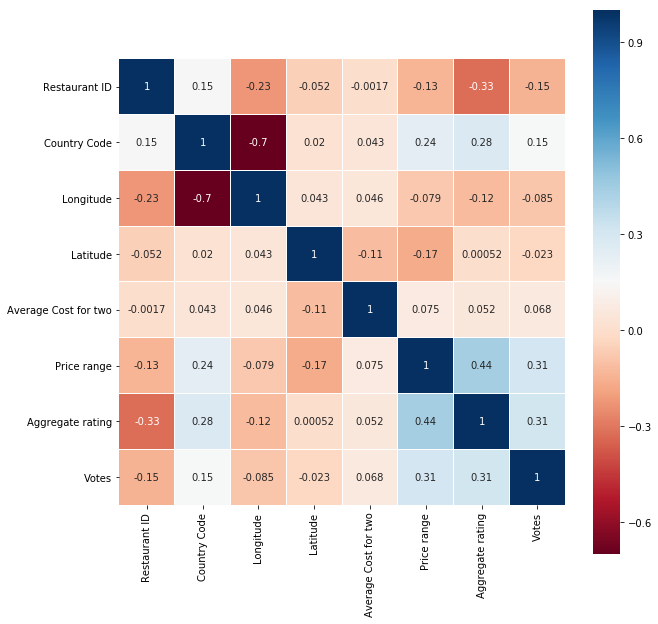

In [16]:
numerical_column = ['int64','float64'] #select only numerical features to find correlation
plt.figure(figsize=(10,10))
sns.heatmap(
    zomato.select_dtypes(include=numerical_column).corr(),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True
)

In [104]:
testeDf = pd.DataFrame((zomato[['Average Cost for two', 'Price range', 'Aggregate rating', 'Rating text', 'Votes']]))

In [105]:
testeDf.rename(columns={'Average Cost for two':'media_preco',
                          'Price range':'price_range',
                          'Aggregate rating':'aggregate_rating',
                            'Rating text':'rating_text',
                          'Votes':'votes'}, 
                 inplace=True)

In [114]:
testeDf['rating_text'] = testeDf['rating_text'].map( {'Not rated': 0, 'Poor': 1, 'Average': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5} ).astype(int)

In [115]:
xTreinamento = np.array(testeDf.drop('media_preco', 1))
yTreinamento = np.array(testeDf.media_preco)

In [130]:
xTreinamento.shape

(9551, 4)

In [116]:
import xgboost as xgb
from sklearn import model_selection

In [117]:
xg_boost = xgb.XGBClassifier()

In [118]:
xg_boost.fit(xTreinamento, yTreinamento)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [120]:
print(xg_boost.score(xTreinamento, yTreinamento))

scores = model_selection.cross_val_score(xg_boost, xTreinamento, yTreinamento, cv=5, scoring='accuracy')
print(scores)
print("Kfold on XGBClassifier: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

0.29075489477541616


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.21561713 0.22595657 0.25434439 0.23944415 0.23576799]
Kfold on XGBClassifier: 0.2342 (+/- 0.0130)


In [133]:
print("Preço para algumas caracteristicas buscadas: ", xg_boost.predict([4, 4.8, 4, 600]))

Preço para algumas caracteristicas buscadas:  [2000]
